# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
load_dotenv()

True

In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en")
btc_headlines

{'status': 'ok',
 'totalResults': 5158,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
   'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
   'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
   'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
   'publishedAt': '2020-12-03T22:00:00Z',
   'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it wor

In [5]:
# Fetch the Ethereum news articles
etc_headlines = newsapi.get_everything(q="ethereum", language="en")
etc_headlines

{'status': 'ok',
 'totalResults': 1359,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
   'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
   'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
   'publishedAt': '2020-11-23T14:16:00Z',
   'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - R

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
btc_df = btc_df[cols]

btc_df.head()

,compound,negative,neutral,positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [7]:
# Create the ethereum sentiment scores DataFrame
etc_sentiments = []

for article in etc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        etc_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
etc_df = pd.DataFrame(etc_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
etc_df = etc_df[cols]

etc_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.244032,0.017579,0.903789,0.078579
std,0.356654,0.035419,0.087501,0.078581
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.827500,0.000000
50%,0.202300,0.000000,0.897000,0.072000
75%,0.532650,0.000000,1.000000,0.157000
max,0.801600,0.103000,1.000000,0.209000


In [9]:
# Describe the Ethereum Sentiment
etc_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.091955,0.014050,0.941400,0.044550
std,0.251162,0.046844,0.101239,0.077609
min,-0.340000,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.931500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.177900,0.000000,1.000000,0.064000
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Etherium

Q. Which coin had the highest positive score?

A: Etherium

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jwber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jwber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jwber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
wnl = WordNetLemmatizer()
def tokenizer(text):
    words = word_tokenize(text)
    words = list(filter(lambda x: x.lower(), words))
    words = list(filter(lambda y: y not in punctuation, words))
    sw = set(stopwords.words('english'))
    words = list(filter(lambda z: z not in sw, words))
    tokens = [wnl.lemmatize(word) for word in words]
 
    return tokens


In [13]:
# Create a new tokens column for bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df


,compound,negative,neutral,positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[Visa, partnered, cryptocurrency, startup, Blo..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[After, reaching, previous, all-time, high, No..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[Its, almost, three, year, day, since, price, ..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[Everything, dumb, work, As, 2020, come, close..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[In, November, 2017, absolutely, massive, two-..."
5,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[Unlike, ‘, conventional, ’, cryptocurrencies,..."
6,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[If, youve, watching, crypto, market, past, we..."
7,0.0258,0.073,0.850,0.076,image copyrightGetty Images\r\nBitcoin has hit...,"[image, copyrightGetty, Images, Bitcoin, hit, ..."
8,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...,"[Six, year, launch, Mexico-based, crypotcurren..."
9,0.4019,0.000,0.883,0.117,Decentralized exchange protocols that allow cr...,"[Decentralized, exchange, protocol, allow, cry..."


In [14]:
# Create a new tokens column for ethereum
etc_df['tokens'] = etc_df.text.apply(tokenizer)
etc_df

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[FILE, PHOTO, Representation, Ethereum, virtua..."
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[FILE, PHOTO, Representation, Ethereum, virtua..."
2,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[LONDON, Reuters, Digital, currency, Ethereum,..."
3,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[FILE, PHOTO, Representations, virtual, curren..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[FILE, PHOTO, A, representation, virtual, curr..."
5,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[FILE, PHOTO, Representations, virtual, curren..."
6,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[NEW, YORK, Reuters, Institutional, investor, ..."
7,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[NEW, YORK, Reuters, Institutional, investor, ..."
8,0.8779,0.000,0.682,0.318,"PayPal has launched the Generosity Network, a ...","[PayPal, launched, Generosity, Network, platfo..."
9,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,"[By, Reuters, Staff, FILE, PHOTO, A, represent..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
n=2
grams = ngrams(tokenizer(btc_df.text.str.cat()),n)
btc_counts = Counter(grams).most_common(20)
btc_counts

[(('virtual', 'currency'), 3),
 (('char', 'By'), 3),
 (('FILE', 'PHOTO'), 3),
 (('illustration', 'taken'), 3),
 (('2020', 'REUTERS/Dado'), 3),
 (('all-time', 'high'), 2),
 (('year', 'day'), 2),
 (('breaking', '20,000'), 2),
 (('image', 'copyrightGetty'), 2),
 (('copyrightGetty', 'Images'), 2),
 (('Images', 'Bitcoin'), 2),
 (('new', 'all-time'), 2),
 (('poster', 'participating'), 2),
 (('world', "'s"), 2),
 (('By', 'Reuters'), 2),
 (('Reuters', 'Staff'), 2),
 (('Staff', 'FILE'), 2),
 (('currency', 'Bitcoin'), 2),
 (('Bitcoin', 'seen'), 2),
 (('PHOTO', 'Representations'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
n=2
grams = ngrams(tokenizer(etc_df.text.str.cat()),n)
etc_counts = Counter(grams).most_common(20)
etc_counts

[(('virtual', 'currency'), 11),
 (('FILE', 'PHOTO'), 10),
 (('currency', 'Bitcoin'), 9),
 (('illustration', 'taken'), 9),
 (('2020', 'REUTERS/Dado'), 9),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 8),
 (('Bitcoin', 'seen'), 8),
 (('LONDON', 'Reuters'), 7),
 (('Ruvic/Illustration', 'LONDON'), 6),
 (('A', 'representation'), 6),
 (('representation', 'virtual'), 6),
 (('taken', 'November'), 6),
 (('November', '19'), 6),
 (('19', '2020'), 6),
 (('char', 'By'), 6),
 (('By', 'Reuters'), 6),
 (('Reuters', 'Staff'), 6),
 (('seen', 'illustration'), 5),
 (('char', 'FILE'), 4),
 (('PHOTO', 'A'), 4)]

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
btc_tokens_10 = tokenizer(btc_df.text.str.cat())
btc_tokens_10 =token_count(btc_tokens_10, N=10)
btc_tokens_10

[('char', 19),
 ('Bitcoin', 11),
 ('The', 7),
 ('2020', 6),
 ('cryptocurrency', 5),
 ('November', 5),
 ('price', 5),
 ('year', 5),
 ('bitcoin', 4),
 ('20,000', 4)]

In [20]:
# Get the top 10 words for Ethereum
etc_tokens_10 = tokenizer(etc_df.text.str.cat())
etc_tokens_10 = token_count(etc_tokens_10, N=10)
etc_tokens_10

[('char', 20),
 ('Reuters', 17),
 ('Bitcoin', 14),
 ('virtual', 12),
 ('currency', 12),
 ('taken', 12),
 ('illustration', 11),
 ('REUTERS/Dado', 11),
 ('FILE', 10),
 ('PHOTO', 10)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

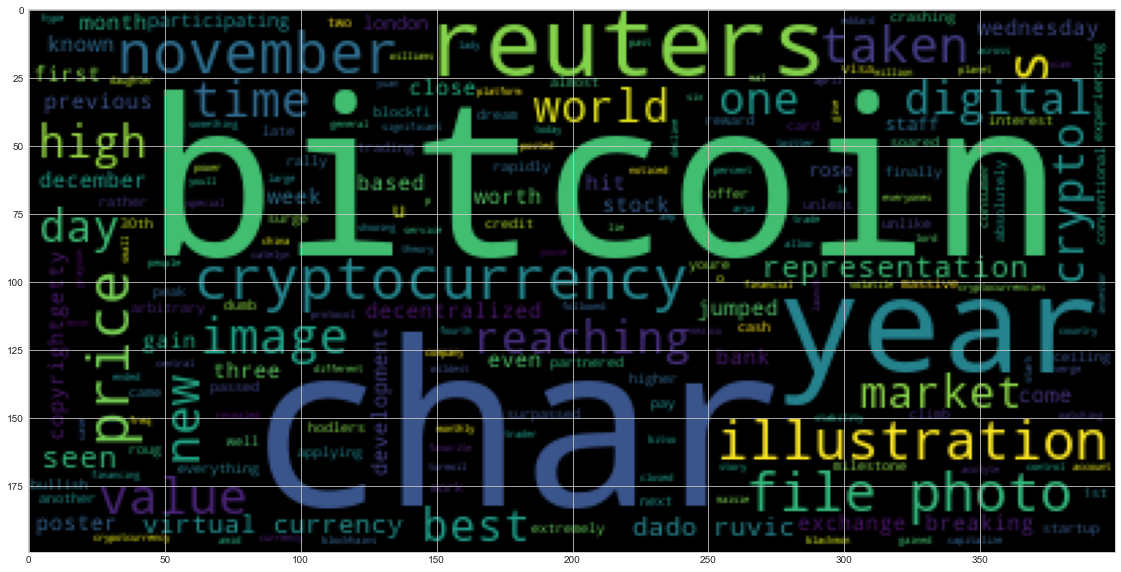

In [22]:
# Generate the Bitcoin word cloud
btc_tokens = [btc_df.text.apply(tokenizer)]
btc_flat_list = []
for sublist in btc_tokens:
    for item in sublist:
        for word in item:
            btc_flat_list.append(word)
btc_flat_list = [i.lower().replace(' ', '_') for i in btc_flat_list]
wc_btc = WordCloud().generate(' '.join(btc_flat_list))
plt.imshow(wc_btc)


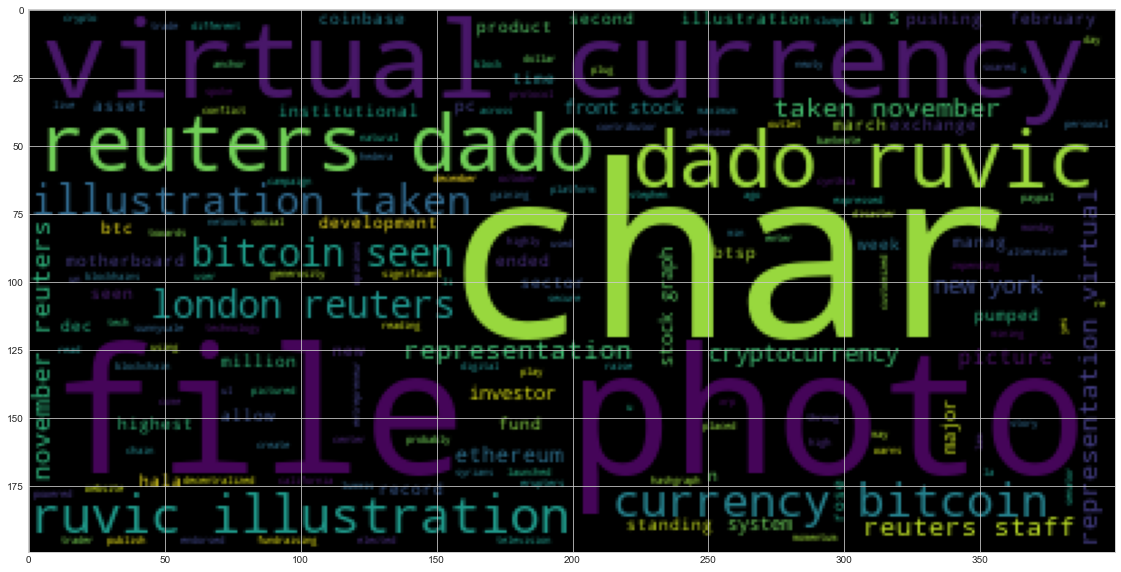

In [23]:
# Generate the Ethereum word cloud
etc_tokens = [etc_df.text.apply(tokenizer)]
etc_flat_list = []
for sublist in etc_tokens:
    for item in sublist:
        for word in item:
            etc_flat_list.append(word)
etc_flat_list = [i.lower().replace(' ', '_') for i in etc_flat_list]
wc_etc = WordCloud().generate(' '.join(etc_flat_list))
plt.imshow(wc_etc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [27]:
# Concatenate all of the bitcoin text together
articles_btc = btc_df['text'][2]
articles_btc

'Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars]'

In [28]:
# Run the NER processor on all of the text
doc_btc = nlp(articles_btc)

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
displacy.render(doc_btc, style='ent', jupyter=True)

In [30]:
# List all Entities
print([(word, word.ent_type_) for word in doc_btc if word.ent_type_])

[(almost, 'DATE'), (three, 'DATE'), (years, 'DATE'), (the, 'DATE'), (day, 'DATE'), (Bitcoin, 'GPE'), (20,000, 'MONEY'), (Wednesday, 'DATE')]


---

## Ethereum NER

In [31]:
# Concatenate all of the bitcoin text together
articles_etc = etc_df['text'][2]
articles_etc

'LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]'

In [32]:
# Run the NER processor on all of the text
doc_etc = nlp(articles_etc)

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
displacy.render(doc_etc, style='ent')

In [147]:
# List all Entities
print([(word, word.ent_type_) for word in doc_etc if word.ent_type_])

[(LONDON, 'GPE'), (Reuters, 'ORG'), (XRP, 'ORG'), (Monday, 'DATE')]
